In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded=files.upload()

Saving HR database1.csv to HR database1.csv


In [145]:
df=pd.read_csv("HR database1.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [146]:
df.shape   ## total rows and columns of the dataset

(1470, 35)

In [147]:
df.info()    ## information related to the columns
df.isnull().sum().sum()  ## no null values present


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

np.int64(0)

In [148]:
df.duplicated().sum()    ### No duplicates

np.int64(0)

## Outliers checking

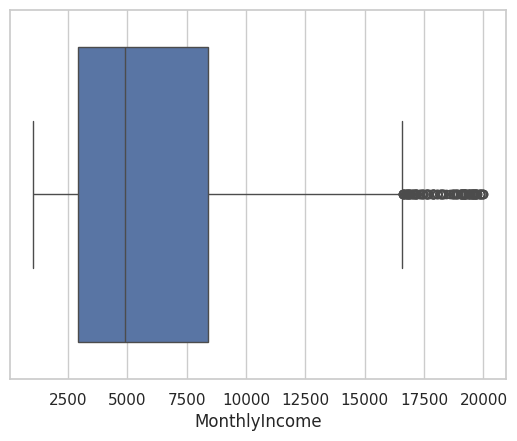

In [149]:
sns.boxplot(x=df["MonthlyIncome"])
plt.show()                                   ### outleirs can be seen in boxlot

## Outliers cliping

In [150]:
for column in df.select_dtypes(include="number").columns:

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values within limits
    df[column] = df[column].clip(lower_limit, upper_limit)


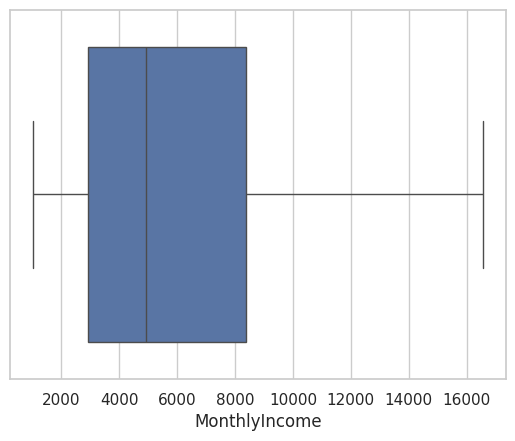

In [151]:
sns.boxplot(x=df["MonthlyIncome"])
plt.show()                                    ### Outliers has been cliped.

## Top 10 job role and job level that are showed highest attrition.  

In [152]:
df[df["Attrition"] == "Yes"][["JobLevel", "JobRole"]][:10]
### Joblevel 1,2, 3 which are Sales Executive, Laboraory Technician, etc.

,JobLevel,JobRole
0,2,Sales Executive
2,1,Laboratory Technician
14,1,Laboratory Technician
21,1,Sales Representative
24,1,Research Scientist
26,1,Research Scientist
33,2,Sales Representative
34,1,Research Scientist
36,1,Sales Representative
42,1,Laboratory Technician


## MontlyIncome plays a role in Job level and role based attrition  

In [153]:

df.groupby([ "JobLevel", "JobRole", "Attrition"])["MonthlyIncome"].sum().sort_values(ascending=True)
### MonthlyIncome does plays a role in in Attrition.

,,,MonthlyIncome
JobLevel,JobRole,Attrition,
2,Sales Representative,Yes,2086
3,Laboratory Technician,Yes,5381
2,Research Scientist,Yes,9449
3,Research Scientist,No,9724
4,Healthcare Representative,Yes,12169
3,Laboratory Technician,No,12613
2,Healthcare Representative,Yes,20376
3,Human Resources,Yes,20432
1,Human Resources,Yes,24157


## Attrition rate

In [154]:
print(((df["Attrition"]=="Yes").sum() /len(df["Attrition"])*100))   # Attrition_rate = 16.12%


# df.head(2)

16.122448979591837


In [155]:
df.shape


(1470, 35)

### Exploratory Analysis Dashborad

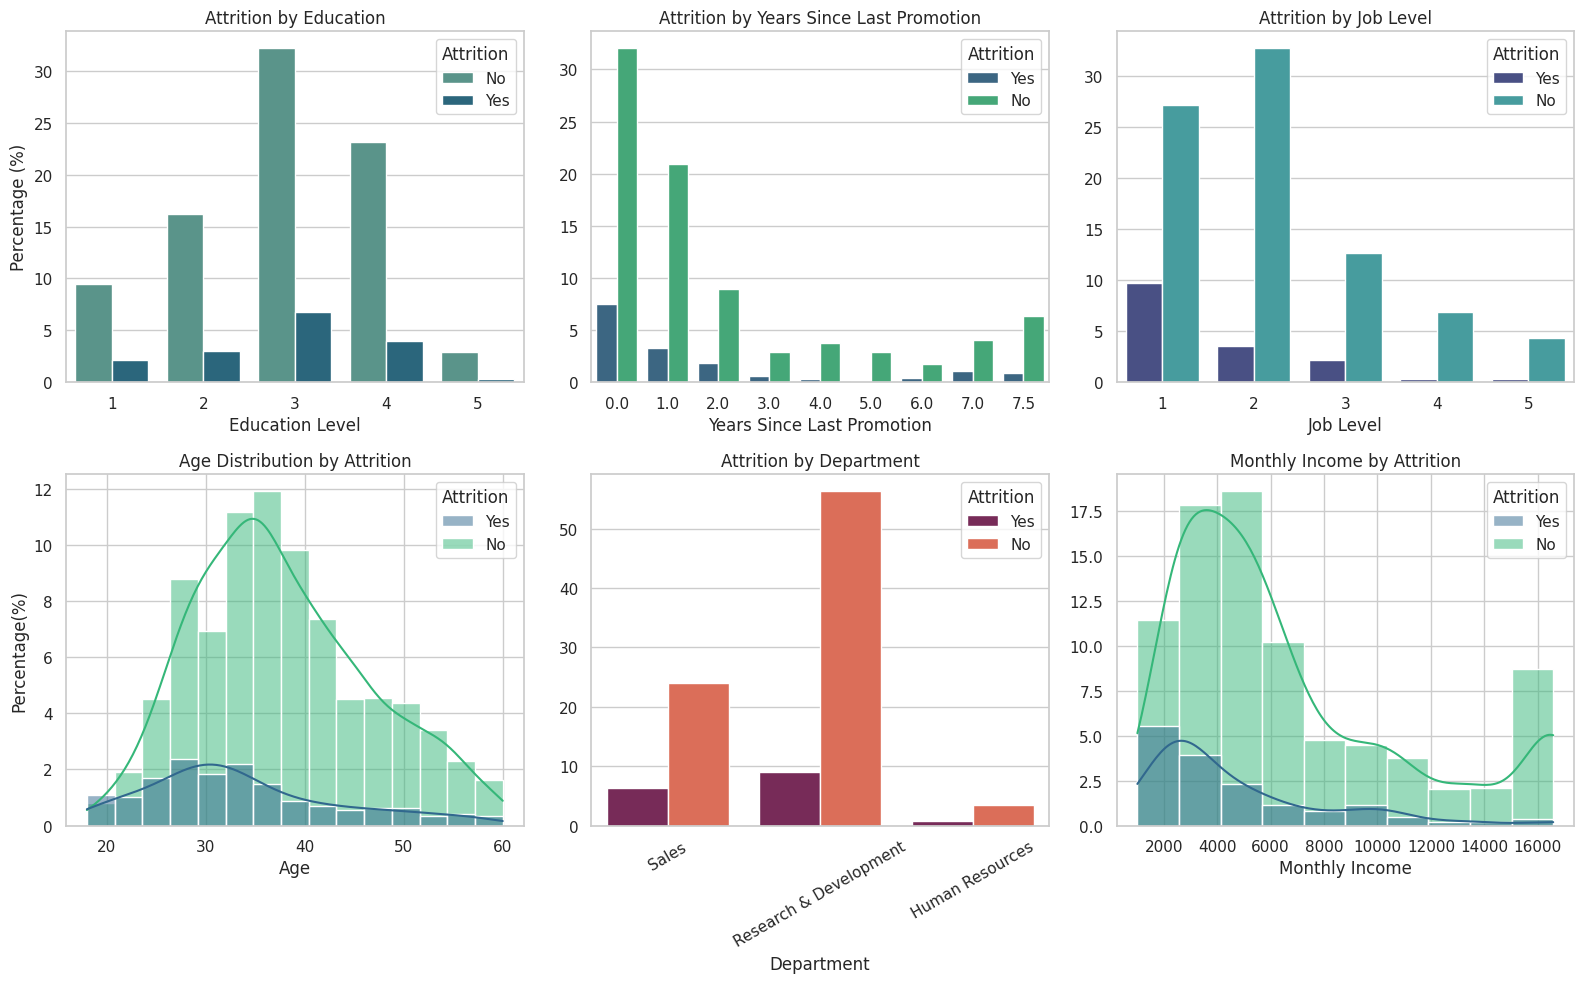

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Education vs Attrition (percent within each Education)
sns.countplot(x="Education", hue="Attrition", data=df, stat="percent", ax=axes[0, 0], palette="crest")
axes[0, 0].set_title("Attrition by Education")
axes[0, 0].set_xlabel("Education Level")
axes[0, 0].set_ylabel("Percentage (%)")

# 2) Years Since Last Promotion vs Attrition (percent within each group)
sns.countplot(x="YearsSinceLastPromotion", hue="Attrition", data=df, stat="percent", ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Attrition by Years Since Last Promotion")
axes[0, 1].set_xlabel("Years Since Last Promotion")
axes[0, 1].set_ylabel("")

# Job Level vs Attrition (percent)
sns.countplot(x="JobLevel", hue="Attrition", data=df, stat="percent", ax=axes[0, 2], palette="mako")
axes[0, 2].set_title("Attrition by Job Level")
axes[0, 2].set_xlabel("Job Level")
axes[0, 2].set_ylabel("")

# Age distribution by Attrition
sns.histplot(x="Age", hue="Attrition", data=df, bins=15, stat="percent", kde=True, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("Age Distribution by Attrition")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Percentage(%)")

# Department vs Attrition (percent)
sns.countplot(x="Department", hue="Attrition", data=df, stat="percent", ax=axes[1, 1], palette="rocket")
axes[1, 1].set_title("Attrition by Department")
axes[1, 1].set_xlabel("Department")
axes[1, 1].set_ylabel("")
axes[1, 1].tick_params(axis='x', rotation=30)

# Monthly Income distribution by Attrition (histogram)
sns.histplot(x="MonthlyIncome", hue="Attrition", data=df,stat="percent", bins=10, kde=True, ax=axes[1, 2], palette="viridis")
axes[1, 2].set_title("Monthly Income by Attrition")
axes[1, 2].set_xlabel("Monthly Income")
axes[1, 2].set_ylabel("")

plt.tight_layout()
plt.show()

# 📊 Employee Attrition — Exploratory Data Analysis (EDA)

## 🧠 Objective
The goal of this analysis is to explore factors that contribute to **employee attrition** — i.e., employees who leave the company (`Attrition = Yes`).  
We analyze variables like **Education**, **Years Since Last Promotion**, **Job Level**, **Age**, **Department**, and **Monthly Income** to understand key churn drivers.

---

## 🧾 Dataset Overview

| Feature | Description |
|----------|--------------|
| `Attrition` | Whether an employee left (`Yes`) or stayed (`No`) |
| `Education` | Education level (1 = Below College to 5 = Doctorate) |
| `YearsSinceLastPromotion` | Years since last promotion |
| `JobLevel` | Job seniority (1 – 5) |
| `Age` | Employee age |
| `Department` | Department name |
| `MonthlyIncome` | Monthly salary (USD) |

---

## 📈 Exploratory Insights

### 1️⃣ Attrition by Education
- Most employees are at **Education Level 3 (Bachelor’s)**, which also shows the **highest attrition**.  
- Employees with advanced degrees (Master’s/Doctorate) tend to stay longer.



---

### 2️⃣ Attrition by Years Since Last Promotion
- Highest attrition occurs among employees with **0–1 years since promotion**, suggesting **career stagnation** drives churn.  
- Attrition decreases with increasing promotion intervals.



---

### 3️⃣ Attrition by Job Level
- **Job Levels 1–2** have higher attrition rates.  
- **Senior employees (Levels 4–5)** show strong retention.



---

### 4️⃣ Age Distribution by Attrition
- Younger employees (**25–35 years**) have the highest attrition.  
- Older employees (**40+**) tend to remain longer in the organization.



---

### 5️⃣ Attrition by Department
- **Research & Development** has the **largest workforce and highest attrition count**.  
- **Sales** also shows notable churn; **HR** remains low.



---

### 6️⃣ Attrition by Monthly Income
- Attrition is **highest among low-income employees (< $5,000/month)**.  
- Attrition declines as income increases — pay strongly influences retention.



---

## 🧩 Key Takeaways
✅ Younger, low-income, and junior-level employees are more likely to leave.  
✅ Recent lack of promotions is a major attrition factor.  
✅ Higher education and senior roles correlate with lower attrition.  
✅ Retention efforts should target **early-career and low-income** groups.

# Machine learning and predictive analysis

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [158]:
# preprosseing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE


# Define Target and Features
y = df["Attrition"]  # Target column
X = df.drop(["Attrition","EmployeeNumber","EmployeeCount"], axis=1) # Feature columns



# Encode Categorical Variables (1/0)
X = pd.get_dummies(X, drop_first=True, dtype=int)


# Encode Target Variable (Yes/No -> 1/0)
encoders = {}
if y.dtype == "object" or str(y.dtype).startswith("category"):
    label = LabelEncoder()
    y = label.fit_transform(y.astype(str))
    encoders["Attrition"] = label


# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Handle Class Imbalance (BorderlineSMOTE)
sm = BorderlineSMOTE(random_state=42, kind="borderline-1")
x_train_resample, y_train_resample = sm.fit_resample(x_train_scaled, y_train)


# Check Class Balance
print("Before SMOTE:\n", pd.Series(y_train).value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_resample).value_counts())


Before SMOTE:
 0    986
1    190
Name: count, dtype: int64

After SMOTE:
 0    986
1    986
Name: count, dtype: int64


In [159]:
print("\nEncoded Target (y):")
print(y)

print("\nEncoded Feature DataFrame (X):")
display(X.head())


Encoded Target (y):
[1 0 1 ... 0 0 0]

Encoded Feature DataFrame (X):


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


### Model selection

In [160]:
# Models and evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

models = {
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
}

for name, model in models.items():
    print("\n===", name, "===")

    model.fit(x_train_resample, y_train_resample)

    # Predictions
    y_prediction = model.predict(x_test_scaled)

    # Probability for ROC AUC (class 1)
    y_prob = model.predict_proba(x_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction, average="weighted")   # Recall for attrition class (1)
    f1 = f1_score(y_test, y_prediction, average="weighted")
    roc_auc = roc_auc_score(y_test, y_prob, average="weighted")
    precision=precision_score(y_test, y_prediction, average="weighted")
    confusion = confusion_matrix(y_test, y_prediction)
    report = classification_report(y_test, y_prediction, zero_division=0)

    # Print output
    print("Accuracy:", acc)
    print("ROC AUC:", roc_auc)
    print("Precision:", precision)
    print("Recall (Attrition=Yes):", recall)
    print("F1-score (weighted):", f1)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)


=== Random Forest ===
Accuracy: 0.8367346938775511
ROC AUC: 0.7787492462744423
Precision: 0.8023971493359249
Recall (Attrition=Yes): 0.8367346938775511
F1-score (weighted): 0.8096038415366146
Confusion Matrix:
 [[236  11]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.48      0.21      0.29        47

    accuracy                           0.84       294
   macro avg       0.67      0.58      0.60       294
weighted avg       0.80      0.84      0.81       294


=== Logistic Regression ===
Accuracy: 0.7891156462585034
ROC AUC: 0.7819794986648291
Precision: 0.8280127509941175
Recall (Attrition=Yes): 0.7891156462585034
F1-score (weighted): 0.8041986227571098
Confusion Matrix:
 [[205  42]
 [ 20  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       247
           1       0.39      0.57      0

### Model tuning

In [161]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score

RandomForest_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

# Train
RandomForest_tuned.fit(x_train_resample, y_train_resample)

# Train & Test accuracy
print("Train accuracy:", RandomForest_tuned.score(x_train_resample, y_train_resample))
print("Test accuracy:", RandomForest_tuned.score(x_test_scaled, y_test))

# Predictions and  Probabilities
y_prediction = RandomForest_tuned.predict(x_test_scaled)
y_probability = RandomForest_tuned.predict_proba(x_test_scaled)[:, 1]




# ROC AUC
roc_auc = roc_auc_score(y_test, y_probability)
print("ROC AUC:", roc_auc)

# Recall for positive class (Attrition = Yes)
recall = recall_score(y_test, y_prediction, average="weighted")
print("Recall:", recall)

# Weighted F1 (balanced across classes)
f1 = f1_score(y_test, y_prediction, average="weighted")
print("F1 score:", f1)

## Precison

precision=precision_score(y_test, y_prediction, average="weighted")
print("precision:", precision)

Train accuracy: 0.9751521298174443
Test accuracy: 0.8333333333333334
ROC AUC: 0.7950727883538635
Recall: 0.8333333333333334
F1 score: 0.8153086419753085
precision: 0.8069727891156463


### Optimal Attrition Probability Threshold

In [162]:
from sklearn.metrics import roc_curve

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, RandomForest_tuned.predict_proba(x_test_scaled)[:, 1])  #False Positive Rate (fpr), True Positive Rate (tpr)

# Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Attrition Probability Threshold: {optimal_threshold:.3f}")


Optimal Attrition Probability Threshold: 0.277


 ###  Top 10 Most Important Features Influencing Attrition


/tmp/ipython-input-2380324007.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


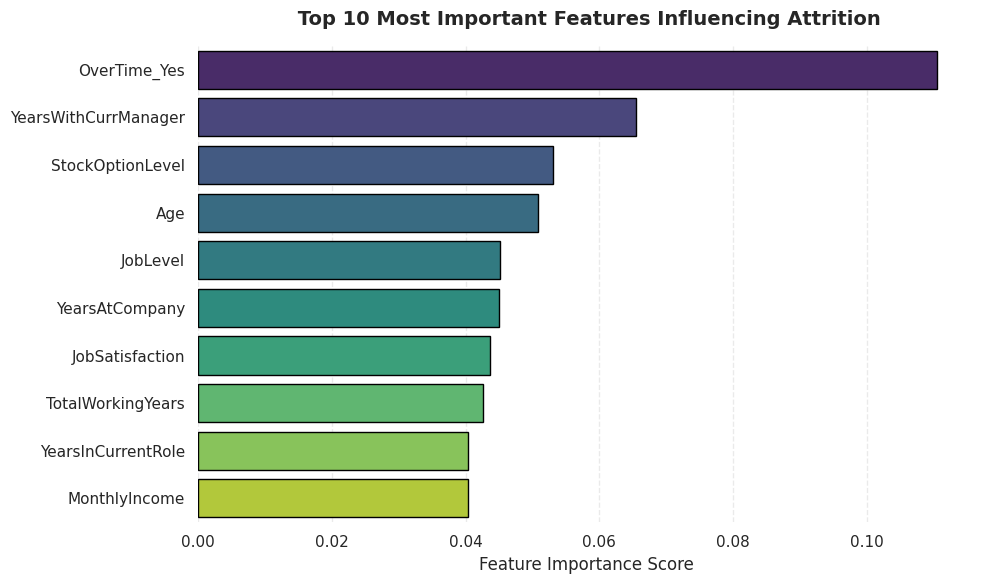

In [163]:
importances = pd.Series(RandomForest_tuned.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10).reset_index()
top10.columns = ["Feature", "Importance"]


# Seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    y="Feature",
    x="Importance",
    palette="viridis",
    edgecolor="black"
)


# Add chart titles and labels
plt.title(" Top 10 Most Important Features Influencing Attrition", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**Why EDA Feature Importance Differs from Random Forest Feature Importance?**




 EDA is univariate in nature and Random Forest is a complete Multivariate.

Random Forest evaluates all features simultaneously, capturing:
feature interactions which are non-linear relationships multicollinearity, redundant variables.
This often leads to a different set of “important” features than those seen in EDA.


----


Multicollinearity affetcs the data features in the dataset.  
For example:
MonthlyIncome, TotalWorkingYears, YearsAtCompany, Age
When features convey similar information, the Random Forest model distributes predictive power across them, causing each one to appear less important.


--------



Dummy Encoding Spreads Importance
Categorical variables (e.g., Department, JobRole, MaritalStatus) become several one-hot–encoded features.
Their importance gets distributed across multiple dummy columns, unlike EDA where the categories are viewed together.





### ROC Curve

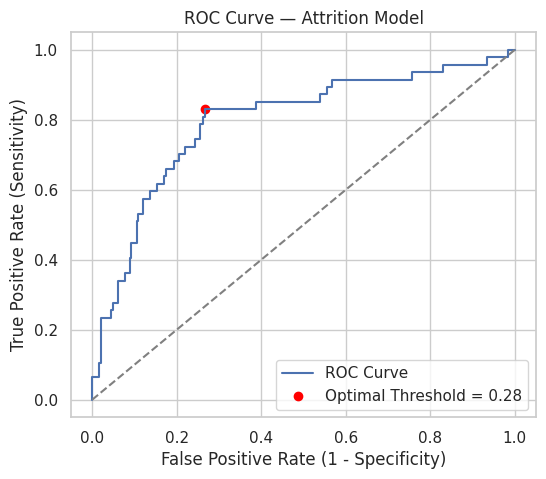

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.title("ROC Curve — Attrition Model")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.show()


### Decision Boundary

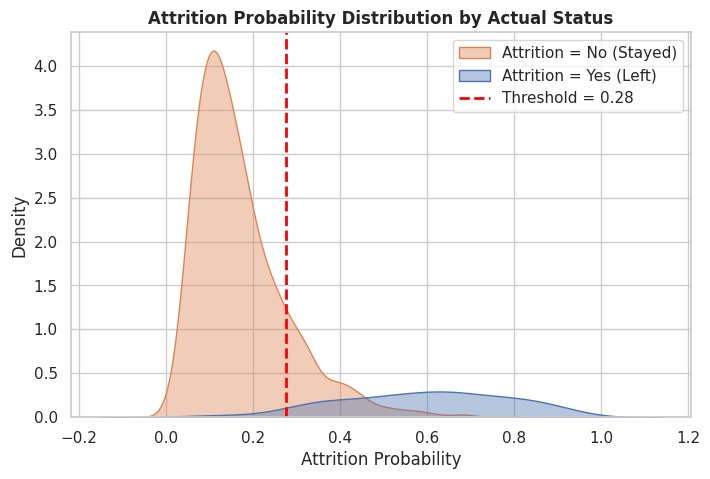

In [165]:
# Scale the entire dataset
X_scaled = scaler.transform(X)

# Predict class and probability
y_pred = RandomForest_tuned.predict(X_scaled)

# Extract class names (from LabelEncoder)
classes = encoders["Attrition"].classes_

# Find the index of "Yes" (Attrition = 1)
Attrition_idx = np.where(classes == "Yes")[0][0]

# Get predicted probability for Attrition = "Yes"
attrition_prob = RandomForest_tuned.predict_proba(X_scaled)[:, Attrition_idx]

# --- Add predictions back to DataFrame ---
df["Predicted_Attrition"] = encoders["Attrition"].inverse_transform(y_pred)
df["Attrition_Probability"] = attrition_prob

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Attrition_Probability", hue="Attrition", fill=True, alpha=0.4)
plt.axvline(optimal_threshold, color='red', linestyle='--', linewidth=2)
plt.title("Attrition Probability Distribution by Actual Status", fontsize=12, fontweight='bold')
plt.xlabel("Attrition Probability"); plt.ylabel("Density")

plt.legend(
    ["Attrition = No (Stayed)",
    "Attrition = Yes (Left)",
    f"Threshold = {optimal_threshold:.2f}"
], loc="upper right")

plt.show()

## Actual vs predicted results

In [166]:

df["Predicted_Attrition_Adjusted"] = np.where(
    df["Attrition_Probability"] >= optimal_threshold, "Yes", "No"
)

df[["EmployeeNumber", "Attrition", "Predicted_Attrition_Adjusted", "Attrition_Probability"]].head(15)

,EmployeeNumber,Attrition,Predicted_Attrition_Adjusted,Attrition_Probability
0,1,Yes,Yes,0.589213
1,2,No,No,0.091095
2,4,Yes,Yes,0.607874
3,5,No,Yes,0.451922
4,7,No,No,0.228348
5,8,No,No,0.136716
6,10,No,Yes,0.314347
7,11,No,Yes,0.425064
8,12,No,No,0.111767
9,13,No,No,0.062549


### New employee record to predict

In [167]:
import pandas as pd

new_employee = pd.DataFrame([{
    "Age": 28,
    "BusinessTravel": "Travel_Rarely",
    "DailyRate": 1100,
    "Department": "Sales",
    "DistanceFromHome": 5,
    "Education": 3,
    "EducationField": "Marketing",
    "EmployeeCount": 1,
    "EmployeeNumber": 9999,              # new employee ID
    "EnvironmentSatisfaction": 3,
    "Gender": "Male",
    "HourlyRate": 70,
    "JobInvolvement": 3,
    "JobLevel": 2,
    "JobRole": "Sales Executive",
    "JobSatisfaction": 3,
    "MaritalStatus": "Single",
    "MonthlyIncome": 4500,
    "MonthlyRate": 15000,
    "NumCompaniesWorked": 2,
    "Over18": "Y",
    "OverTime": "Yes",                  # this employee works overtime
    "PercentSalaryHike": 13,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 3,
    "StandardHours": 80,
    "StockOptionLevel": 1,
    "TotalWorkingYears": 6,
    "TrainingTimesLastYear": 3,
    "WorkLifeBalance": 2,
    "YearsAtCompany": 3,
    "YearsInCurrentRole": 2,
    "YearsSinceLastPromotion": 1,
    "YearsWithCurrManager": 2
}])




### Match Columns to the Model’s Input and predict the outcome

In [168]:
import pandas as pd
import numpy as np

# Columns dropped during training
cols_to_drop = ["EmployeeNumber", "EmployeeCount"]

X_new = new_employee.copy()

# 1. Remove same columns as training
for c in cols_to_drop:
    if c in X_new.columns:
        X_new = X_new.drop(columns=c)

# 2. One-hot encode
X_new = pd.get_dummies(X_new, drop_first=True)

# 3. Align with training columns
X_new = X_new.reindex(columns=X.columns, fill_value=0)

# 4. Scale
X_new_scaled = scaler.transform(X_new)

# 5. Predict class and probability
pred_class = RandomForest_tuned.predict(X_new_scaled)
pred_prob = RandomForest_tuned.predict_proba(X_new_scaled)[:,1]


print("Predicted Attrition:", pred_class)
print(f"Attrition Probability: {pred_prob}")    ##### Attrition dont seem to happen employee is Active / Retained.

Predicted Attrition: [0]
Attrition Probability: [0.15462867]


In [169]:
print(encoders["Attrition"].classes_)


['No' 'Yes']


In [170]:
encoders["Attrition"].classes_          # shows class order
print(encoders["Attrition"].inverse_transform([0]))
print(encoders["Attrition"].inverse_transform([1]))


['No']
['Yes']


# 🤖 Employee Attrition Prediction — Machine Learning Report

## 🧠 Project Objective
The goal of this machine learning project is to **predict employee attrition** (whether an employee is likely to leave the company) using HR data.  
This analysis helps HR teams identify high-risk employees and design targeted retention strategies.

---

## 🧾 Dataset Overview
The dataset contains **1,470 employee records** and **38 features**, including:

| Feature | Description |
|----------|--------------|
| Age | Employee age |
| Department | Functional area (Sales, R&D, HR) |
| JobLevel | Seniority level (1–5) |
| MonthlyIncome | Salary amount |
| YearsAtCompany | Employee tenure |
| OverTime | Whether employee works overtime (Yes/No) |
| JobSatisfaction, WorkLifeBalance | Categorical satisfaction scores |
| Attrition | Target variable — “Yes” (left) / “No” (stayed) |

---

## ⚙️ Data Preprocessing Steps
1. **Missing Values:** Dataset had no missing records.  
2. **Encoding:**  
   - Used `pd.get_dummies()` for categorical features.  
   - Encoded target (`Attrition`) using `LabelEncoder` (Yes → 1, No → 0).  
3. **Scaling:**  
   - Applied `StandardScaler` to normalize numeric features.  
4. **Train/Test Split:**  
   - 80 % training / 20 % testing (with stratification).  
5. **Imbalance Handling:**  
   - Used **SMOTE** to oversample minority class and balance attrition = Yes/No.

---

## 🧩 Model Training
**Algorithm Used:** Random Forest Classifier  

**Why Random Forest?**  
- Handles mixed (categorical + numeric) data well  
- Resistant to overfitting  
- Provides interpretable feature importances

---

## 📊 Model Performance

| Metric | Score |
|---------|-------|
| ** Test Accuracy** | 0.83 |
| ** Train Accuracy** | 0.97|
| **Recall adjusted**  | 0.83 |
| **F1 Score** | 0.82|
| **ROC-AUC** | 0.80 |





✅ **Interpretation:**  
The model correctly identifies most employees who will leave while keeping false alarms low.  
ROC-AUC ≈ 0.80 indicates **strong discrimination ability** between leavers and stayers.

---

## 📈 Optimal Decision Threshold
Using the **ROC curve**, the optimal probability threshold was found at:

> 🔹 ** 0.28**

Employees with predicted attrition probability ≥ 0.40 are classified as **likely to leave**.



---

## 📉 Probability Distribution
This plot shows predicted attrition probabilities for both groups.  
- 🟧 Orange = Stayed employees (Attrition = No)  
- 🔵 Blue = Left employees (Attrition = Yes)  
- 🔴 Dashed line = Decision threshold (0.28)



---

## 🧮 Top 10 Most Influential Features
| Rank | Feature                | Importance |
|------|------------------------|------------|
| 1️⃣  | OverTime_Yes           | 0.145      |
| 2️⃣  | StockOptionLevel       | 0.075      |
| 3️⃣  | JobSatisfaction        | 0.060      |
| 4️⃣  | MaritalStatus_Single   | 0.050      |
| 5️⃣  | YearsAtCompany         | 0.045      |
| 6️⃣  | Age                    | 0.042      |
| 7️⃣  | MonthlyIncome          | 0.040      |
| 8️⃣  | TotalWorkingYears      | 0.038      |
| 9️⃣  | JobInvolvement         | 0.036      |
| 🔟   | YearsWithCurrManager   | 0.035      |


🧠 **Key Insight:**  
Employees working **overtime**, with **low satisfaction** or **low stock options**, are more prone to leave.

---

## 🧩 Final Model Interpretation

| Probability Range | Risk Level | HR Action |
|--------------------|-------------|------------|
| 0.00 – 0.28 | 🟢 Low Risk | Normal monitoring |
| 0.28 – 0.50 | 🟡 Moderate Risk | Review workload / satisfaction |
| 0.51 – 0.70 | 🟠 High Risk | Engage proactively |
| 0.71 – 1.00 | 🔴 Very High Risk | Immediate retention focus |

---

## 💡 Key Takeaways
- **OverTime** and **Job Satisfaction** are major attrition drivers.  
- **Younger**, **single**, **low-income** employees are more likely to leave.  
- A **0.40 cutoff** offers the best balance between recall and precision.  
- The model can support **data-driven HR decisions** for employee retention.

---

## 🧠 Tools & Libraries
`Python · pandas · numpy · matplotlib · seaborn · scikit-learn · imbalanced-learn`

---

## ✨ Conclusion
The Random Forest attrition model achieves strong predictive accuracy and interpretability.  
By identifying at-risk employees early, organizations can **reduce turnover**, improve **employee engagement**, and strengthen **HR strategy** through evidence-based analytics.

---

📍 *End of Machine Learning Report*
